# MULTIPLE REGRESSION AND CORRELATION ANALYSIS

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import statsmodels.api as sm
import statsmodels.graphics.api as smg

In [4]:
data=pd.read_excel('data_multiple.xlsx')

In [5]:
data

,Y,X1,X2
0,2,5,30
1,6,5,35
2,6,8,36
3,9,5,40
4,10,8,45
5,12,11,50
6,15,11,60
7,20,5,80
8,30,15,120
9,40,17,150


In [6]:
data=np.array(data)

#Slicing variables as independent and dependent
x=data[:,1:]
y=data[:,0:1]

#Add constant to independent varibles matrix
c=np.ones(len(y))
X=np.column_stack((c,x))

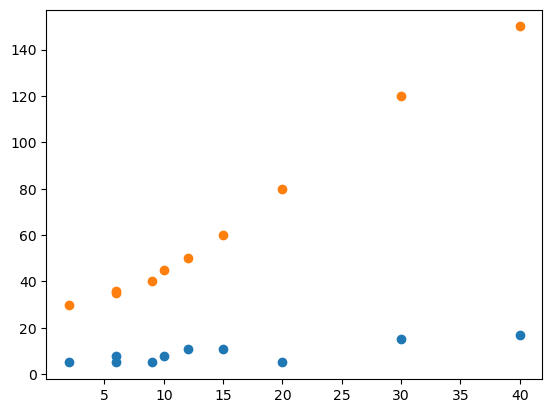

In [7]:
plt.scatter(y,x[:,0:1])
plt.scatter(y,x[:,1:])
plt.show()

### Multiple Regression

In [8]:
multiple_reg=sm.OLS(y,X)
res_multiple_reg=multiple_reg.fit()

In [9]:
print(res_multiple_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     282.6
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.03e-07
Time:                        20:23:36   Log-Likelihood:                -16.416
No. Observations:                  10   AIC:                             38.83
Df Residuals:                       7   BIC:                             39.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1352      1.126     -3.673      0.0

C:\Users\MUSTAFA KARAKUZU\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
r_mult_reg=res_multiple_reg.predict()
show_values=np.column_stack((y,x,r_mult_reg))
table1=tabulate(show_values,headers=['Y','X1','X2','Pred Y'],tablefmt='fancy_grid')
print(table1)

╒═════╤══════╤══════╤══════════╕
│   Y │   X1 │   X2 │   Pred Y │
╞═════╪══════╪══════╪══════════╡
│   2 │    5 │   30 │  4.8101  │
├─────┼──────┼──────┼──────────┤
│   6 │    5 │   35 │  6.24107 │
├─────┼──────┼──────┼──────────┤
│   6 │    8 │   36 │  6.74298 │
├─────┼──────┼──────┼──────────┤
│   9 │    5 │   40 │  7.67203 │
├─────┼──────┼──────┼──────────┤
│  10 │    8 │   45 │  9.31871 │
├─────┼──────┼──────┼──────────┤
│  12 │   11 │   50 │ 10.9654  │
├─────┼──────┼──────┼──────────┤
│  15 │   11 │   60 │ 13.8273  │
├─────┼──────┼──────┼──────────┤
│  20 │    5 │   80 │ 19.1197  │
├─────┼──────┼──────┼──────────┤
│  30 │   15 │  120 │ 31.2865  │
├─────┼──────┼──────┼──────────┤
│  40 │   17 │  150 │ 40.0161  │
╘═════╧══════╧══════╧══════════╛


### Correlation Analysis

#### Correlation Matrix

In [11]:
corr=np.corrcoef(data, rowvar=False)

In [12]:
print(tabulate(corr, headers=['Y','X1','X2']))

       Y        X1        X2
--------  --------  --------
1         0.827684  0.993751
0.827684  1         0.824326
0.993751  0.824326  1


#### Multiple Correlation Coefficent

## $r_{y\hat{y}} = \frac{\sum (y_{i}-\bar{y_{i}})(\hat{y_{i}}-\bar{y_{i}})}{\sum(y_{i}-\bar{y_{i}})^2\sum(\hat{y_{i}}-\bar{y_{i}})^2} $

In [13]:
np.sqrt(res_multiple_reg.rsquared)

0.993864298263292

Multiple correlation coefficent represent that relation between dependent variable and independents variables.
This coefficent is between $-1 \le  r_{y\hat{y}}  \le 1$ like Pearson correlation coefficent. When this coefficent goes to 0 we can say that the relation between independent variables and dependent variable is weak, vice versa we can say that relation is strong. According to sign of coefficent, can be interpreted the direction of relation as well.

#### Part and Partial Correlation

#####  Part Correlation

## $r_{y(X_i X_j)} = \frac{\sum (y_{n}-\bar{y_{n}})(e_{n(X_i X_j)})}{\sum(y_{n}-\bar{y_{n}})^2\sum(e_{n(X_i X_j)})^2} $

As known the square of Pearson correlation coefficient give the ${R^2}$ in basic regression. But when we create the multiple regression, to reach the same result is not available. To seperatly calculate the relations of y and every x, this formula have to use.

##### Partial Correlation

## $r_{y X_i.X_j} = \frac{\sum (e_{n(y.X_j)})(e_{n(X_i.X_j)})}{\sum(e_{n(y.X_j)})^2\sum(e_{n(X_i.X_j)})^2} $

${R^2}$ obtained from multiple regression show the performance of all independent variables, thus this is not to represent of individual performance of variables. To analysis the contribition of independent variable which added later in multiple regression, the partial correlation method is used. 

In [14]:
#CORRELATION ALAYSIS
#--------------------
#X1
x1=data[:,1:2]
X1=np.column_stack((c,x1))

#X2
x2=data[:,2:3]
X2=np.column_stack((c,x2))


#PART CORRELATION
#------------------
#PART COR. FOR X1
y_x2_reg=sm.OLS(y,X2).fit()
r_y_x2 = y_x2_reg.rsquared
r_y_X1_X2 = np.sqrt(res_multiple_reg.rsquared - r_y_x2)


#PART COR. FOR X2
y_x1_reg=sm.OLS(y,X1).fit()
r_y_x1 = y_x1_reg.rsquared
r_y_X2_X1 = np.sqrt(res_multiple_reg.rsquared - r_y_x1)


#PARTIAL CORRELATION
#-------------------
#PARTIAL COR. FOR X1
y_X2=sm.OLS(y,X2).fit()
resid_y_X2 = np.array([y_X2.resid])
x1_X2=sm.OLS(x1,X2).fit()
resid_x1_X2 = np.array([x1_X2.resid])
r_y_x1_x2 = (np.sum(np.multiply(resid_y_X2,resid_x1_X2)))/np.sqrt(np.sum(resid_y_X2**2)*np.sum(resid_x1_X2**2))


#PARTIAL COR. FOR X2
y_X1=sm.OLS(y,X1).fit()
resid_y_X1 = np.array([y_X1.resid])
x2_X1=sm.OLS(x2,X1).fit()
resid_x2_X1 = np.array([x2_X1.resid])
r_y_x2_x1 = (np.sum(np.multiply(resid_y_X1,resid_x2_X1)))/np.sqrt(np.sum(resid_y_X1**2)*np.sum(resid_x2_X1**2))

In [15]:
headers=['Variables','Part Correlation','Partial Correlation']

data_show=[
      ['x1',r_y_X1_X2,r_y_x1_x2],
      ['x2',r_y_X2_X1,r_y_x2_x1]
      ]
table2=tabulate(data_show,headers,tablefmt="fancy_grid")
print(table2)

╒═════════════╤════════════════════╤═══════════════════════╕
│ Variables   │   Part Correlation │   Partial Correlation │
╞═════════════╪════════════════════╪═══════════════════════╡
│ x1          │          0.0150321 │              0.134668 │
├─────────────┼────────────────────┼───────────────────────┤
│ x2          │          0.550186  │              0.980385 │
╘═════════════╧════════════════════╧═══════════════════════╛


According to results of showing above,  we can analysis part and partial correlation.
From aspect of $X1$ variable, we can say that part correlation coefficient is 0.015 and  the relation between $y$ and $X1$ is so weak. Partial correlation coefficient of $X1$ show  that 0.13 of the $R^2$ of the multiple regression is calculated with the contribution of $X1$ thus  it  can intuitively be said that $X1$ is statisticaly insignificant. The probabilty value of $X1$ that bigger than 0.05 alpha significance level indicates same result.
$X2$ can be analysed with similiar process as well. 
